In [58]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [3]:
raw_movie = pd.read_csv("rawData.csv", sep='|')

In [43]:
raw_movie.describe()

,domestic_gross,opening_per_theater,opening_weekend_take,production_budget,widest_release,worldwide_gross,year,complete,metascore,num_user_ratings,runtime_minutes,unable to retrieve
count,3.305000e+03,3242.000000,3.242000e+03,1.507000e+03,3267.000000,2.627000e+03,3347.000000,3347,3271.000000,3206.000000,3294.000000,0
mean,3.746890e+07,7876.739050,9.302936e+06,4.671307e+07,1408.373431,9.405645e+07,2005.665073,0.910965,57.651483,122.292888,107.380389,NaN
std,5.798597e+07,8402.588393,1.437162e+07,4.103343e+07,1303.585481,1.518945e+08,7.717237,0.284837,18.073014,219.873472,19.317212,NaN
min,7.200000e+01,72.000000,7.200000e+01,2.200000e+02,1.000000,7.200000e+01,1967.000000,False,1.000000,4.000000,60.000000,NaN
25%,6.858390e+05,3300.000000,5.134250e+04,1.700000e+07,58.000000,6.247501e+06,2002.000000,1,45.000000,23.000000,94.000000,NaN
50%,1.440156e+07,5624.500000,3.761571e+06,3.500000e+07,1212.000000,3.857436e+07,2007.000000,1,58.000000,57.000000,104.000000,NaN
75%,5.185488e+07,9590.000000,1.326648e+07,6.500000e+07,2635.500000,1.210275e+08,2012.000000,1,71.000000,130.000000,117.000000,NaN
max,7.605076e+08,204230.000000,1.741446e+08,2.150000e+08,4468.000000,2.787965e+09,2015.000000,True,100.000000,4002.000000,325.000000,NaN


In [22]:
print raw_movie.isnull().sum()

alt_title                  0
director_x              1321
domestic_gross            42
mojo_slug                  0
opening_per_theater      105
opening_weekend_take     105
production_budget       1840
release_date_limited    3073
release_date_wide          3
title_x                    0
widest_release            80
worldwide_gross          720
year                       0
scrubbed_title             0
complete                   0
director_y                 1
genre                      3
metacritic_page            0
metascore                 76
num_critic_reviews         0
num_user_ratings         141
num_user_reviews           0
rating                    85
release_date               0
runtime_minutes           53
studio                    49
title_y                    0
unable to retrieve      3347
user_score                 0
dtype: int64


In [91]:
raw_movie_2012 = raw_movie[raw_movie.year<=2012]

In [93]:
print raw_movie_2012.shape, raw_movie.shape

(2729, 29) (3347, 29)


In [103]:
director_avg = raw_movie_2012.groupby(['director_y']).mean()

In [104]:
director_avg.describe()

,domestic_gross,opening_per_theater,opening_weekend_take,production_budget,widest_release,worldwide_gross,year,complete,metascore,num_user_ratings,runtime_minutes,unable to retrieve
count,1.465000e+03,1441.000000,1.441000e+03,7.420000e+02,1451.000000,1.241000e+03,1480.000000,1480.000000,1448.000000,1432.000000,1454.000000,0
mean,2.937447e+07,7482.631983,7.522606e+06,3.932645e+07,1251.336942,7.192026e+07,2005.392122,0.898252,56.713072,93.577691,103.856326,NaN
std,4.381453e+07,6518.380504,1.099219e+07,3.328729e+07,1205.758426,1.085414e+08,6.267376,0.290297,17.125066,130.975747,16.618973,NaN
min,2.640000e+02,107.000000,1.070000e+02,2.200000e+02,1.000000,7.590000e+02,1968.500000,0.000000,1.000000,4.000000,68.000000,NaN
25%,5.431000e+05,3463.000000,4.301300e+04,1.400000e+07,40.000000,4.882577e+06,2003.000000,1.000000,45.000000,22.000000,92.500000,NaN
50%,1.191666e+07,5849.833333,3.009341e+06,3.000000e+07,1023.000000,2.938648e+07,2007.000000,1.000000,57.000000,52.500000,101.000000,NaN
75%,4.281458e+07,9281.000000,1.129122e+07,5.503000e+07,2384.400000,9.641376e+07,2010.000000,1.000000,70.000000,109.041667,113.000000,NaN
max,4.745447e+08,68801.000000,1.103072e+08,2.000000e+08,4199.500000,1.063172e+09,2012.000000,1.000000,94.000000,1505.142857,272.000000,NaN


In [105]:
director_avg_count = raw_movie_2012[['alt_title','director_y']].groupby('director_y').count()

In [106]:
director_avg['movie_num'] = director_avg_count['alt_title']

In [107]:
director_year = raw_movie_2012[['year','director_y']].groupby(['director_y']).agg(['min', 'max'])

In [108]:
director_avg['time_since_last_movie']=2012 - director_year.year['max']
director_avg['director_year_to2012']=2012-director_year.year['min']+1

In [109]:
director_avg['director_year']=director_year.year['max']-director_year.year['min']+1

In [110]:
print sum(director_avg['director_year']<1), sum(director_avg['time_since_last_movie']<0), sum(director_avg['director_year_to2012']<1)

0 0 0


In [111]:
director_avg['movie_per_year_tolast']=map(lambda x, y: x*1.0/y, director_avg['movie_num'], director_avg['director_year'])
director_avg['movie_per_year_to2012']=map(lambda x, y: x*1.0/y, director_avg['movie_num'], director_avg['director_year_to2012'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x150b7c850>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x13f677cd0>]], dtype=object)

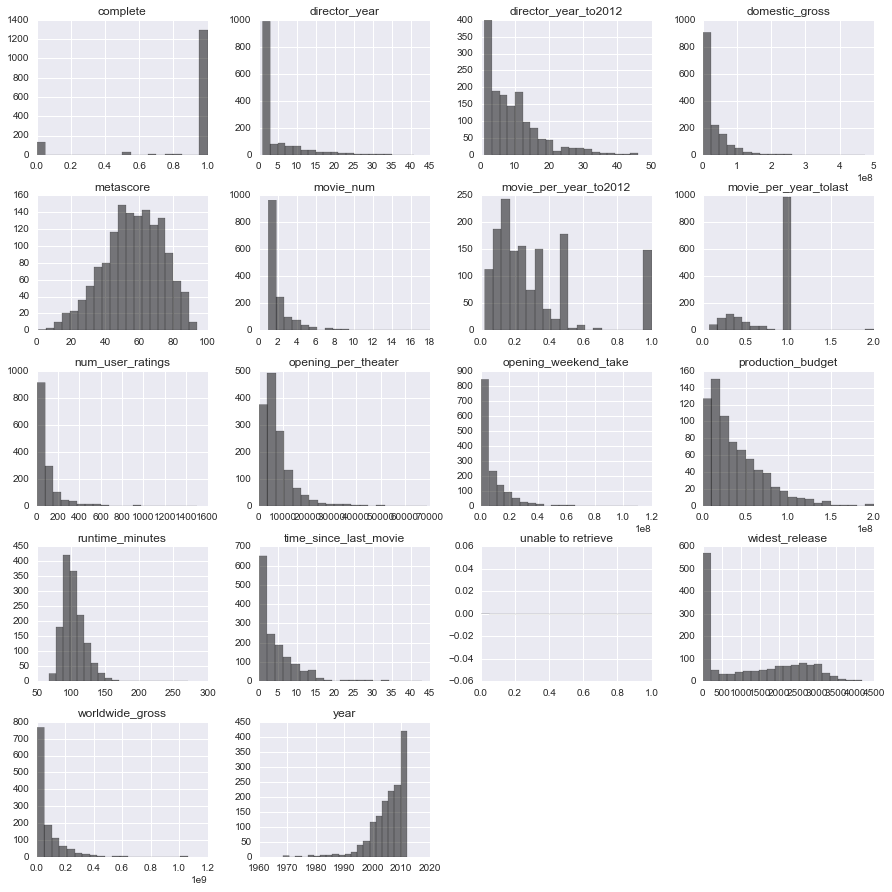

In [112]:
plt.figure()
director_avg.hist(color='k', alpha=0.5, bins=20, figsize=(15, 15))

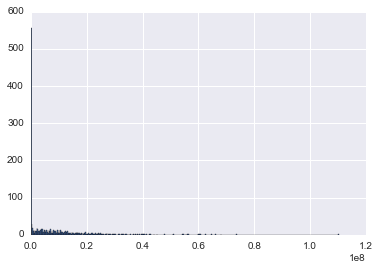

In [113]:
director_avg.opening_weekend_take.hist(bins=500)
#(n, bins, patches) = plt.hist(director_avg.opening_weekend_take, bins=300)
plt.show()

In [ ]:
#from pandas.tools.plotting import scatter_matrix
#scatter_matrix(director_avg.dropna(), alpha=0.2, figsize=(15, 15), diagonal='kde')

In [114]:
sum(director_avg.opening_weekend_take<1e6)

623

In [117]:
sum(director_avg.opening_weekend_take.isnull())

39

In [115]:
director_avg.describe()

,domestic_gross,opening_per_theater,opening_weekend_take,production_budget,widest_release,worldwide_gross,year,complete,metascore,num_user_ratings,runtime_minutes,unable to retrieve,movie_num,time_since_last_movie,director_year_to2012,director_year,movie_per_year_tolast,movie_per_year_to2012
count,1.465000e+03,1441.000000,1.441000e+03,7.420000e+02,1451.000000,1.241000e+03,1480.000000,1480.000000,1448.000000,1432.000000,1454.000000,0,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000
mean,2.937447e+07,7482.631983,7.522606e+06,3.932645e+07,1251.336942,7.192026e+07,2005.392122,0.898252,56.713072,93.577691,103.856326,NaN,1.843243,4.968919,9.268919,4.300000,0.798769,0.320285
std,4.381453e+07,6518.380504,1.099219e+07,3.328729e+07,1205.758426,1.085414e+08,6.267376,0.290297,17.125066,130.975747,16.618973,NaN,1.693489,5.905302,7.990654,6.247477,0.318581,0.265737
min,2.640000e+02,107.000000,1.070000e+02,2.200000e+02,1.000000,7.590000e+02,1968.500000,0.000000,1.000000,4.000000,68.000000,NaN,1.000000,0.000000,1.000000,1.000000,0.074074,0.022727
25%,5.431000e+05,3463.000000,4.301300e+04,1.400000e+07,40.000000,4.882577e+06,2003.000000,1.000000,45.000000,22.000000,92.500000,NaN,1.000000,1.000000,3.000000,1.000000,0.500000,0.133333
50%,1.191666e+07,5849.833333,3.009341e+06,3.000000e+07,1023.000000,2.938648e+07,2007.000000,1.000000,57.000000,52.500000,101.000000,NaN,1.000000,3.000000,7.000000,1.000000,1.000000,0.250000
75%,4.281458e+07,9281.000000,1.129122e+07,5.503000e+07,2384.400000,9.641376e+07,2010.000000,1.000000,70.000000,109.041667,113.000000,NaN,2.000000,7.000000,13.000000,5.000000,1.000000,0.400000
max,4.745447e+08,68801.000000,1.103072e+08,2.000000e+08,4199.500000,1.063172e+09,2012.000000,1.000000,94.000000,1505.142857,272.000000,NaN,18.000000,43.000000,46.000000,41.000000,2.000000,1.000000


In [60]:
Counter(director_avg.movie_num)

Counter({1: 1192,
         2: 302,
         3: 123,
         4: 81,
         5: 45,
         6: 23,
         7: 29,
         8: 9,
         9: 6,
         10: 3,
         11: 3,
         12: 2,
         13: 1,
         14: 2,
         18: 1,
         19: 1})

In [116]:
Counter(director_avg.metascore)

Counter({nan: 1,
         1.0: 1,
         9.0: 1,
         11.0: 2,
         12.0: 2,
         13.0: 4,
         14.0: 1,
         14.5: 1,
         15.0: 1,
         16.0: 5,
         17.0: 4,
         18.0: 2,
         19.0: 8,
         20.0: 1,
         21.0: 3,
         21.5: 1,
         22.0: 4,
         23.0: 5,
         24.0: 9,
         25.0: 4,
         26.0: 10,
         27.0: 5,
         28.0: 11,
         28.666666666666668: 1,
         29.0: 6,
         30.0: 11,
         31.0: 7,
         32.0: 8,
         33.0: 13,
         33.5: 3,
         34.0: 7,
         34.25: 1,
         35.0: 10,
         36.0: 17,
         36.333333333333336: 1,
         36.5: 1,
         37.0: 19,
         37.5: 3,
         38.0: 9,
         38.5: 2,
         39.0: 11,
         40.0: 18,
         41.0: 11,
         41.25: 2,
         42.0: 15,
         43.0: 18,
         44.0: 17,
         45.0: 26,
         46.0: 18,
         46.25: 1,
         47.0: 19,
         48.0: 15,
         49.0: 27,


In [120]:
#40 40-80 80+
#
#2+
#director_avg.opening_weekend_take<1e6
#director_avg

director_avg['director_open_1M']=director_avg.opening_weekend_take<1e6

In [123]:
def group_num(x):
    bucket = ''
    if x<=1:
        bucket = '1'
    elif x<5 and x>1:
        bucket = '2-4'
    elif x>=5:
        bucket = '5+'
    else:
        pass
    return bucket

def group_rating(x):
    bucket = ''
    if x<40:
        bucket = 'bad'
    elif x<=80:
        bucket = 'average'
    elif x>80:
        bucket = 'good'
    else:
        pass
    return bucket
director_avg['director_num_bucket']= map(group_num, director_avg.movie_num)
director_avg['director_rating_bucket']=map(group_rating, director_avg.metascore)

In [125]:
print director_avg.director_num_bucket.value_counts()

1      964
2-4    414
5+     102
Name: director_num_bucket, dtype: int64


In [126]:
print director_avg.director_rating_bucket.value_counts()

average    1094
bad         240
good        114
             32
Name: director_rating_bucket, dtype: int64


In [128]:
print director_avg.director_open_1M.value_counts()

False    857
True     623
Name: director_open_1M, dtype: int64


In [129]:
print  director_avg.isnull().sum()

domestic_gross              15
opening_per_theater         39
opening_weekend_take        39
production_budget          738
widest_release              29
worldwide_gross            239
year                         0
complete                     0
metascore                   32
num_user_ratings            48
runtime_minutes             26
unable to retrieve        1480
movie_num                    0
time_since_last_movie        0
director_year_to2012         0
director_year                0
movie_per_year_tolast        0
movie_per_year_to2012        0
director_open_1M             0
director_num_bucket          0
director_rating_bucket       0
dtype: int64


In [130]:
director_avg.head()

,domestic_gross,opening_per_theater,opening_weekend_take,production_budget,widest_release,worldwide_gross,year,complete,metascore,num_user_ratings,...,unable to retrieve,movie_num,time_since_last_movie,director_year_to2012,director_year,movie_per_year_tolast,movie_per_year_to2012,director_open_1M,director_num_bucket,director_rating_bucket
director_y,,,,,,,,,,,,,,,,,,,,,
Aaron Blaise,85336277.0,6404,19404492,NaN,3030.00,2.503978e+08,2003.00,1.00,48,64,...,NaN,1,9,10,1,1.000000,0.100000,False,1,average
Aaron Katz,141358.0,14513,14513,NaN,11.00,1.413580e+05,2011.00,1.00,64,10,...,NaN,1,1,2,1,1.000000,0.500000,True,1,average
Aaron Schneider,9176933.0,22046,88182,7000000,570.00,9.695282e+06,2010.00,1.00,77,56,...,NaN,1,2,3,1,1.000000,0.333333,True,1,average
Aaron Seltzer,35178092.5,5636,15507827,20000000,2755.75,7.278122e+07,2007.25,0.75,13,301,...,NaN,4,4,7,3,1.333333,0.571429,False,2-4,bad
Abbas Kiarostami,1373975.0,15587,77937,NaN,57.00,5.455736e+06,2011.00,1.00,82,31,...,NaN,1,1,2,1,1.000000,0.500000,True,1,good


In [137]:
director_avg[['director_open_1M', 'director_num_bucket', 'director_rating_bucket']].to_csv(\
    "/Users/kgx347/Documents/Study/bigdataAcademy/BootCamp/DSBootcamp_ProjectW1/director_grade.csv", \
                                                            sep="|", header=True, index = False, encoding = "utf-8")

In [134]:
director_avg[['director_open_1M', 'director_num_bucket', 'director_rating_bucket']].head()

,director_open_1M,director_num_bucket,director_rating_bucket
director_y,,,
Aaron Blaise,False,1,average
Aaron Katz,True,1,average
Aaron Schneider,True,1,average
Aaron Seltzer,False,2-4,bad
Abbas Kiarostami,True,1,good


In [140]:
director_avg.director = director_avg.index

In [142]:
director_avg.columns

Index([u'domestic_gross', u'opening_per_theater', u'opening_weekend_take',
       u'production_budget', u'widest_release', u'worldwide_gross', u'year',
       u'complete', u'metascore', u'num_user_ratings', u'runtime_minutes',
       u'unable to retrieve', u'movie_num', u'time_since_last_movie',
       u'director_year_to2012', u'director_year', u'movie_per_year_tolast',
       u'movie_per_year_to2012', u'director_open_1M', u'director_num_bucket',
       u'director_rating_bucket'],
      dtype='object')